# Task 5.: Lottery numbers

## Task description

Write two functions, which generate 5 and 6 random lottery numbers in accordance with the standard rules of the Hungarian lottery [1,2]. (Additional notes: At "Lottery 5" in Hungary there are 5 numbers chosen randomly from a pool of numbers ranging from 1 to 90. Analogically at "Lottery 6" there are 6 numbers choosen randomly, but this time from a pool of numbers ranging from 1 to 45.

- Write a function which could be optinally called with a `seed` argument, which initializes the RNG. If we call the function with the same seed, it should always return the same numbers!
- Try whether if your function works as intended, also make tests to  the behaviour of the seed argument.
- Return the numbers in an ascending order!
- Ron both function $100\,000$ times and calculate the difference between the two smallest numbers in every case!
- Make a histogram of this difference distribution!

## Theoretical background

During the task I'm constantly comparing the capabilities of `Python`'s built-in standard library called `random` and `numpy`'s available random methods. Both of them encompass a Mersenne Twister as their main RNG, but somewhat differs in actual functionality.

### Sources
[1] : http://www.lottoszamok.net/otoslotto/szabalyok/  
[2] : http://www.lottoszamok.net/hatoslotto/szabalyok/

## Solving the task

In [256]:
import sys
import random
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### Just some matplotlib and seaborn parameter tuning

In [258]:
# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

### Lottery RNGs

In [207]:
def lottery_5(seed_st=None, seed_np=None):
    
    # Set seed for Python's std library
    random.seed(seed_st)
    
    # Set seed for numpy's RNG
    np.random.seed(seed_np)
    
    return sorted(np.random.randint(1, 91, size=5)), sorted(random.sample(range(1,91), 5))

In [208]:
def lottery_6(seed_st=None, seed_np=None):
    
    # Set seed for Python's std library
    random.seed(seed_st)
    
    # Set seed for numpy's RNG
    np.random.seed(seed_np)
    
    return sorted(np.random.randint(1, 46, size=6)), sorted(random.sample(range(1,46), 6))

### Test basic functionality

#### Without pre-set seed

In [238]:
# Print the result N times
N = 5

print('{0} different result WITHOUT pre-set seed (Lottery 5):'.format(N))
for i in range(N):
    print(lottery_5())
print()
print('{0} different result WITHOUT pre-set seed (Lottery 6):'.format(N))
for i in range(N):
    print(lottery_6())

5 different result WITHOUT pre-set seed (Lottery 5):
([11, 24, 42, 60, 64], [16, 41, 42, 52, 81])
([6, 35, 61, 67, 70], [5, 19, 38, 47, 70])
([15, 24, 39, 62, 74], [1, 7, 45, 75, 81])
([9, 10, 17, 32, 86], [4, 35, 48, 60, 64])
([6, 27, 32, 48, 66], [7, 12, 16, 52, 82])

5 different result WITHOUT pre-set seed (Lottery 6):
([4, 8, 24, 34, 38, 41], [4, 9, 18, 19, 24, 42])
([3, 7, 11, 13, 22, 27], [1, 8, 27, 35, 42, 45])
([1, 1, 3, 6, 11, 14], [2, 8, 27, 36, 39, 44])
([7, 15, 19, 22, 26, 35], [1, 5, 9, 13, 17, 18])
([1, 3, 17, 25, 29, 37], [22, 24, 26, 31, 34, 45])


#### With pre-set seed
##### Test 1.

In [239]:
# Pre-set seed for Python's std library
# (This is the seed used for Minecraft 1.8.9 set-seed speedrun WRs)
seed_st = 4929216164286115443

# Pre-set seed for numpy's RNG
# (This is the funny number haha)
seed_np = 42

# Print the result N times
N = 5

print('{0} different result WITH pre-set seed (Lottery 5):'.format(N))
for i in range(N):
    print(lottery_5(seed_st, seed_np))
print()
print('{0} different result WITH pre-set seed (Lottery 6):'.format(N))
for i in range(N):
    print(lottery_6(seed_st, seed_np))

5 different result WITH pre-set seed (Lottery 5):
([15, 21, 52, 61, 72], [5, 60, 66, 74, 83])
([15, 21, 52, 61, 72], [5, 60, 66, 74, 83])
([15, 21, 52, 61, 72], [5, 60, 66, 74, 83])
([15, 21, 52, 61, 72], [5, 60, 66, 74, 83])
([15, 21, 52, 61, 72], [5, 60, 66, 74, 83])

5 different result WITH pre-set seed (Lottery 6):
([8, 15, 21, 29, 39, 43], [3, 30, 33, 37, 41, 42])
([8, 15, 21, 29, 39, 43], [3, 30, 33, 37, 41, 42])
([8, 15, 21, 29, 39, 43], [3, 30, 33, 37, 41, 42])
([8, 15, 21, 29, 39, 43], [3, 30, 33, 37, 41, 42])
([8, 15, 21, 29, 39, 43], [3, 30, 33, 37, 41, 42])


##### Test 2.

Setting both RNGs with the same seed

In [245]:
# Pre-set seed for Python's std library
# (The other funny number comedy)
seed_st = 137

# Pre-set seed for numpy's RNG
# (The other funny number comedy)
seed_np = 137

# Print the result N times
N = 5

print('{0} different result WITH pre-set seed (Lottery 5):'.format(N))
for i in range(N):
    print(lottery_5(seed_st, seed_np))
print()
print('{0} different result WITH pre-set seed (Lottery 6):'.format(N))
for i in range(N):
    print(lottery_6(seed_st, seed_np))

5 different result WITH pre-set seed (Lottery 5):
([20, 39, 76, 78, 79], [10, 24, 25, 42, 53])
([20, 39, 76, 78, 79], [10, 24, 25, 42, 53])
([20, 39, 76, 78, 79], [10, 24, 25, 42, 53])
([20, 39, 76, 78, 79], [10, 24, 25, 42, 53])
([20, 39, 76, 78, 79], [10, 24, 25, 42, 53])

5 different result WITH pre-set seed (Lottery 6):
([12, 14, 15, 20, 31, 39], [5, 12, 13, 15, 21, 27])
([12, 14, 15, 20, 31, 39], [5, 12, 13, 15, 21, 27])
([12, 14, 15, 20, 31, 39], [5, 12, 13, 15, 21, 27])
([12, 14, 15, 20, 31, 39], [5, 12, 13, 15, 21, 27])
([12, 14, 15, 20, 31, 39], [5, 12, 13, 15, 21, 27])


### Creating histogram

In [277]:
# Run the functions N times
N = 100000

# List to store differences of smallest numbers
diff = np.zeros(N)

for i in range(N):
    diff[i] = lottery_5()[0][0] - lottery_6()[0][0]

In [278]:
hist, bins = np.histogram(diff, bins=20, density=True)
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

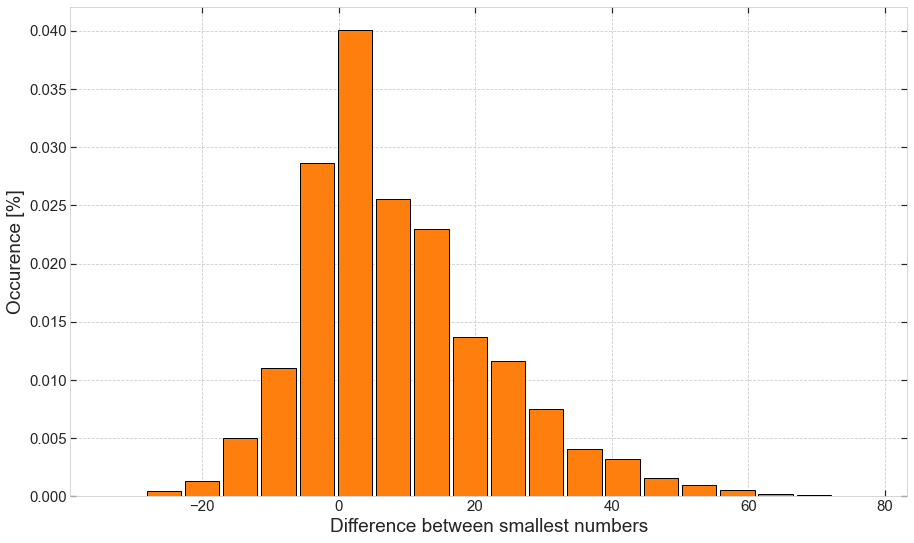

In [279]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,9))

axislabelsize = 19
axisticksize = 15
axislegendsize = 14

axes.bar(center, hist, align='center', width=width,
         color='tab:orange', edgecolor='black')

axes.set_xlabel('Difference between smallest numbers', fontsize=axislabelsize)
axes.set_ylabel('Occurence [%]', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.show()